In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from IPython.display import Image, display_jpeg
import glob
import numpy as np
from PIL import Image


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 128 samples in 0.008s...
[t-SNE] Computed neighbors for 128 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 128 / 128
[t-SNE] Mean sigma: 7027.437086
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 59.1771049, gradient norm = 0.4849103 (50 iterations in 0.109s)
[t-SNE] Iteration 100: error = 65.4912796, gradient norm = 0.4521460 (50 iterations in 0.114s)
[t-SNE] Iteration 150: error = 60.4670677, gradient norm = 0.5360231 (50 iterations in 0.106s)
[t-SNE] Iteration 200: error = 58.9577065, gradient norm = 0.5234022 (50 iterations in 0.104s)
[t-SNE] Iteration 250: error = 58.7103615, gradient norm = 0.5051295 (50 iterations in 0.108s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.710361
[t-SNE] Iteration 300: error = 0.8641691, gradient norm = 0.0111957 (50 iterations in 0.105s)
[t-SNE] Iteration 350: error = 0.6302735, gradient norm = 0.005936

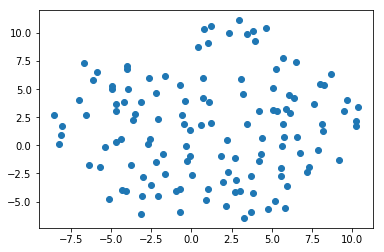

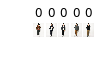

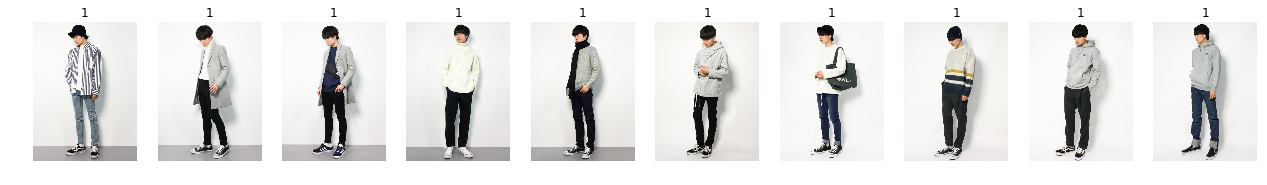

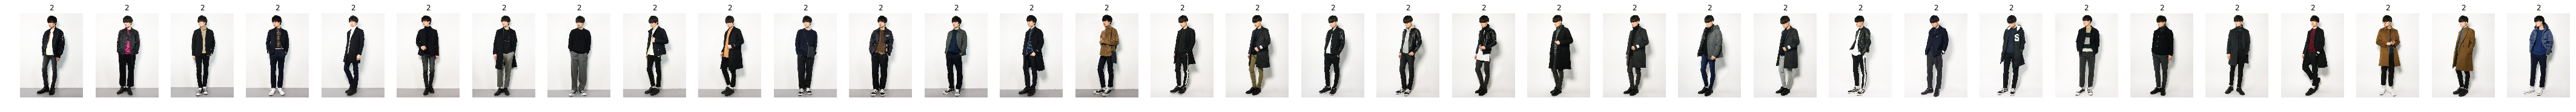

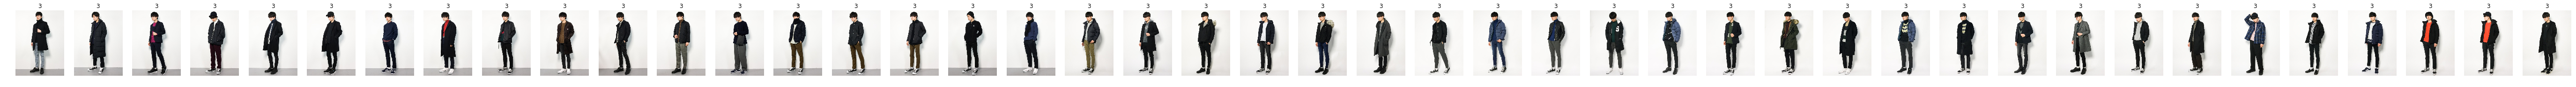

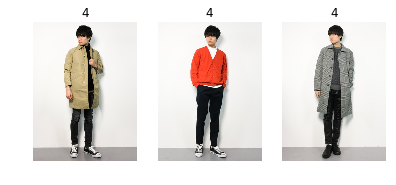

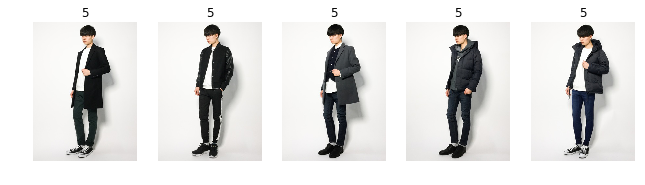

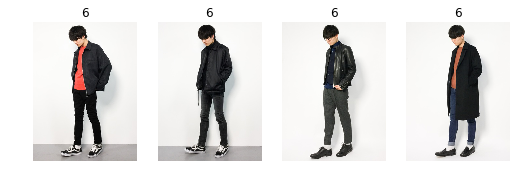

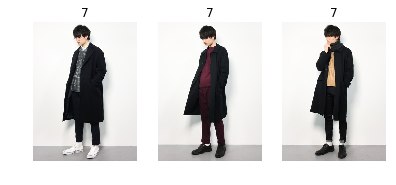

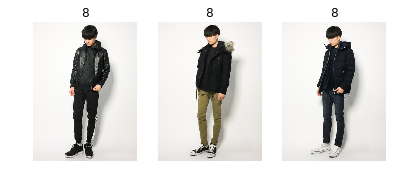

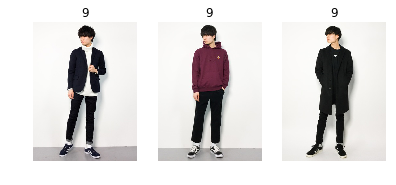

In [90]:
def img_to_matrix(filename, verbose=False):
    img = Image.open(filename)
    if verbose:
        print('changing size from %s to %s' % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    imgArray = np.asarray(img)
    return imgArray  # imgArray.shape = (167 x 300 x 3)


def flatten_image(img):
    s = img.shape[0] * img.shape[1] * img.shape[2]
    img_wide = img.reshape(1, s)
    return img_wide[0]

def main():
    files = glob.glob("./wear_images/*.jpg")
    data = []
    for image in files:
        img = img_to_matrix(image)
        img = flatten_image(img)
        data.append(img)
    data = np.array(data)

    tsne = TSNE(n_components=2,init='random',random_state=101,method='barnes_hut',n_iter=1000,verbose=2).fit_transform(data)
    x = []
    y = []
    for d in tsne:
        x.append(d[0])
        y.append(d[1])    
    plt.scatter(x,y)
    
    dbscan = DBSCAN(eps=1.5, min_samples=3)
    labels = dbscan.fit_predict(tsne)
    
    plt.figure(figsize=(100,200))
    r = 0
    c = 0
    for l,f in sorted(zip(labels, files)):
        #print(l,f)
        if l >= 0:
            if r == l:
                c += 1
            else:
                plt.figure(figsize=(100,200))
                c = 1
                r = l
            im = Image.open(f)
            im_list = np.asarray(im)
            plt.subplot(1,45,c+1)
            plt.axis('off')
            plt.imshow(im_list)
            plt.title(l)
    
if __name__ == "__main__":
    main()